# 2 DOFs robot 

In [5]:
# create data
import numpy as np
import openpyxl

l1 = 50
l2 = 40
l3 = 20


wb = openpyxl.Workbook()
sheet = wb.active
sheet['A1'] = 'Px'
sheet['B1'] = 'Py'
sheet['C1'] = 't1' # theta 1
sheet['D1'] = 't2' # theta 2

r = 1;
for i in range(0, 500 ):
    for j in range(0, 1000):
        t1 = i/10
        t2 = j/10
        px = l1*np.cos(t1*3.14/180) + l2*np.cos((t1+t2)*3.14/180)
        py = l1*np.sin(t1*3.14/180) + l2*np.sin((t1+t2)*3.14/180)
        r += 1
        px_txt = sheet.cell(row= r, column= 1)
        px_txt.value= f'{px}'

        py_txt = sheet.cell(row= r, column= 2)
        py_txt.value= f'{py}'

        t1_txt = sheet.cell(row= r, column= 3)
        t1_txt.value= f'{t1}'

        t2_txt = sheet.cell(row= r, column= 4)
        t2_txt.value= f'{t2}'

wb.save('2DOFs_robot.csv')
        

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('2DOFs_robot.csv')
x = data.drop(['t1', 't2'], axis= 1)
print(x)
y = data.drop(['Px', 'Py'], axis= 1)
print(y)
col_names = list(x.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(x)
X_df = pd.DataFrame(X_df, columns= col_names)
X_df.describe().T

               Px         Py
0       90.000000   0.000000
1       89.999939   0.069778
2       89.999757   0.139555
3       89.999452   0.209332
4       89.999026   0.279109
...           ...        ...
499995  -2.179670  58.638998
499996  -2.215217  58.578954
499997  -2.250659  58.518847
499998  -2.285996  58.458679
499999  -2.321228  58.398449

[500000 rows x 2 columns]
          t1    t2
0        0.0   0.0
1        0.0   0.1
2        0.0   0.2
3        0.0   0.3
4        0.0   0.4
...      ...   ...
499995  49.9  99.5
499996  49.9  99.6
499997  49.9  99.7
499998  49.9  99.8
499999  49.9  99.9

[500000 rows x 2 columns]


,count,mean,std,min,25%,50%,75%,max
Px,500000.0,1.711631e-14,1.000001,-2.476850,-0.732088,0.065001,0.820042,1.671738
Py,500000.0,-7.471047e-15,1.000001,-3.423101,-0.619892,0.176983,0.771843,1.605534


In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.25, random_state = 7)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)

model.add(Dense(128, activation= 'relu', kernel_initializer= 'random_normal', input_shape = (2,)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(2))

model.summary()
model.compile(loss='mse', optimizer = RMSprop(), metrics = 'accuracy')

history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,282
Trainable params: 25,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


367/367 [==============================] - 6s 13ms/step - loss: 256.9513 - mean_absolute_error: 9.4414 - val_loss: 17.9876 - val_mean_absolute_error: 3.4547
Epoch 2/100
367/367 [==============================] - 5s 13ms/step - loss: 9.6558 - mean_absolute_error: 2.2558 - val_loss: 12.3163 - val_mean_absolute_error: 2.8496
Epoch 3/100
367/367 [==============================] - 4s 11ms/step - loss: 6.7414 - mean_absolute_error: 1.8602 - val_loss: 7.2475 - val_mean_absolute_error: 2.0215
Epoch 4/100
367/367 [==============================] - 4s 11ms/step - loss: 5.7764 - mean_absolute_error: 1.6970 - val_loss: 3.5998 - val_mean_absolute_error: 1.4651
Epoch 5/100
367/367 [==============================] - 4s 11ms/step - loss: 5.1908 - mean_absolute_error: 1.5993 - val_loss: 5.1457 - val_mean_absolute_error: 1.7677
Epoch 6/100
367/367 [==============================] - 4s 11ms/step - loss: 4.7931 - mean_absolute_error: 1.5313 - val_loss: 3.5085 - val_mean_absolute_error: 1.5385
Epoch 7/100


In [ ]:
model.save('2DOFs.h5')
y_pred = model.predict(X_test)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['theta1','theta2','t1_predict','t2_predict'])
print(y_pred)
print(cal)

[[ 5.2910833 84.105286 ]
 [41.75325   56.443146 ]
 [39.82489   77.7049   ]
 ...
 [42.537495  26.618408 ]
 [36.24441   50.306515 ]
 [33.124336  26.515043 ]]
        theta1  theta2  t1_predict  t2_predict
0          4.8    84.7    5.291083   84.105286
1         41.2    57.2   41.753250   56.443146
2         39.2    78.2   39.824890   77.704903
3         10.5    68.0   10.999907   67.482475
4         10.2    28.1   10.523020   27.205727
...        ...     ...         ...         ...
124995    45.2    35.4   45.856396   34.382385
124996    42.4    16.2   43.066086   15.451261
124997    42.1    27.1   42.537495   26.618408
124998    35.7    50.6   36.244411   50.306515
124999    32.8    27.2   33.124336   26.515043

[125000 rows x 4 columns]


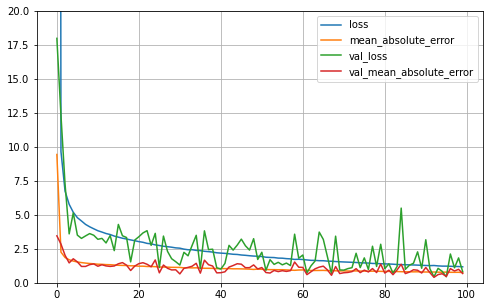

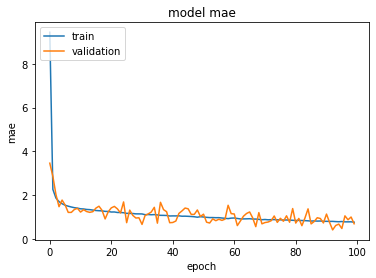

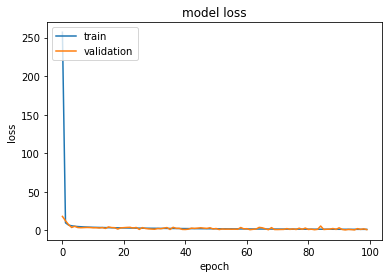

In [ ]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,20)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

# 3 DOFs


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from math import cos, sin, pi
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

px = []
py = []

theta_1 = []
theta_2 = []
theta_3 = []

phi = []

l1 = 40
l2 = 50
l3 = 20

# Nhân 12 để tạo range hoạt động rộng hơn cho cho robot 
# step = 5
for x in range (0,90*12, 5):
    for y in range (0,120*12, 5):
      for z in range(0, 150*12, 5):
        t1 = x/12
        t2 = y/12
        t3 = z/12

        theta_1.append(t1)
        theta_2.append(t2)
        theta_3.append(t3)

        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) 
        + l3*cos((t1+t2+t3)*pi/180), 2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) 
        + l3*sin((t1+t2+t3)*pi/180), 2))
        phi.append(t1+t2+t3)

# export cvs file
df = DataFrame(np.c_[theta_1,theta_2,theta_3,px,py,phi],columns
               = ['theta1','theta2','theta3','px','py','phi'])
export_csv = df.to_csv (r'3DOFs_robot.csv', index = None, header=True)

In [ ]:
# x, y splt data
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv('3DOFs_robot.csv')
x = data.drop(['theta1', 'theta2', 'theta3'], axis= 1)
y = data.drop(['px', 'py','phi'], axis= 1)
col= list(x.columns)
s_scaler = StandardScaler()
x_df = s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df, columns= col)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
px,22394880.0,9.215640e-14,1.0,-1.902418,-0.787979,-1.360276e-01,0.708182,2.661751
py,22394880.0,-1.194388e-14,1.0,-2.934768,-0.725135,3.917296e-02,0.729544,2.159280
phi,22394880.0,4.439329e-18,1.0,-2.929198,-0.711037,4.640385e-16,0.711037,2.929198


In [4]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.25, random_state= 7)

model = Sequential()
model.add(Dense(128, activation= 'relu', kernel_initializer='random_normal', input_shape= (3,)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(3))
model.summary()

model.compile(optimizer = RMSprop(), loss= 'mse', metrics= ['mean_absolute_error'])
history= model.fit(x_train, y_train, batch_size = 8192, epochs= 10, verbose= 1, validation_data= (x_test, y_test))
score= model.evaluate(x_test, y_test, verbose= 0)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               512       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 33,923
Trainable params: 33,923
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2051/2051 [==============================] - 103s 49ms/step - loss: 141.5435 - mean_absolute_error: 5.8603 - val_loss: 13.7528 - val_mean_absolute_error: 2.5935
Epoch 2/10

In [7]:
# predict model
import numpy as np
model.save('3DOF_Robot.h5')
y_pred = model.predict(x_test)
print(y_pred)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['theta1', 'theta2', 'theta3','theta1 predict','theta2 predict', 'theta3 predict'])
print(cal)

[[ 23.258915  44.372086  62.077366]
 [ 35.652065   9.094913  48.481968]
 [  9.950885 114.89054   33.453693]
 ...
 [ 80.61343   73.51791   22.642279]
 [ 77.88145   38.26484  109.97144 ]
 [ 70.64312   72.71182   99.7563  ]]
            theta1      theta2      theta3  theta1 predict  theta2 predict  \
0        22.083333   45.416667   61.250000       23.258915       44.372086   
1        33.750000   12.083333   47.500000       35.652065        9.094913   
2         8.333333  115.416667   32.916667        9.950885      114.890541   
3         9.583333   97.500000   95.000000       11.637750       97.153816   
4        62.083333   46.666667   57.916667       63.408627       46.710316   
...            ...         ...         ...             ...             ...   
5598715  77.500000   70.833333   95.833333       79.415192       71.090622   
5598716  11.250000   57.916667   64.583333       12.135407       58.045734   
5598717  78.750000   74.166667   20.833333       80.613426       73.517906  

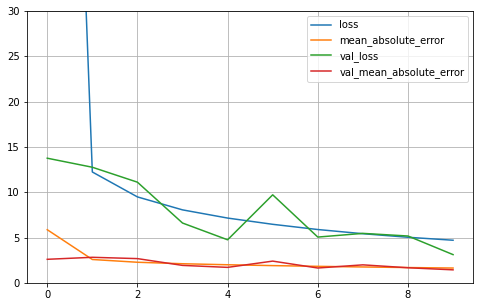

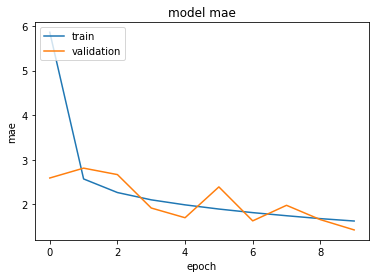

In [8]:
# Show Diagram
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,30)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()